<a href="https://colab.research.google.com/github/vp-82/fastai-demo/blob/main/week_01_star_wars_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install fast.ai

In [1]:
!pip install fastai -q --upgrade

In [2]:
!pip install kaggle -q

In [3]:
from google.colab import files
import os

## Data preparation

In [4]:
if not os.path.exists('./kaggle.json'):
  files.upload()


Saving kaggle.json to kaggle.json


In [10]:
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

In [7]:
from kaggle.api.kaggle_api_extended import KaggleApi
from fastai.vision.all import *

In [11]:
api = KaggleApi()
api.authenticate()

In [12]:
dataset_path = './datasets/starwars/'

In [13]:
if not os.path.exists(dataset_path):
    api.dataset_download_files(dataset='mathurinache/star-wars-images', unzip=True, path=dataset_path)

In [14]:
failed = verify_images(get_image_files(dataset_path))
failed.map(Path.unlink)
len(failed)

0

## Main part: create and train the model

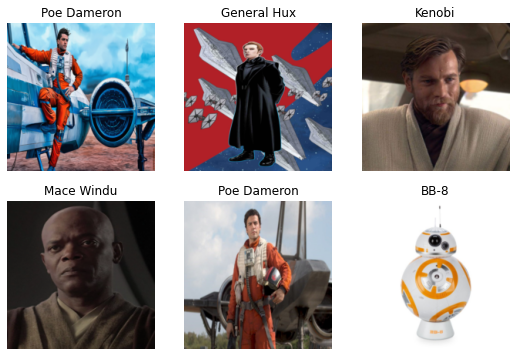

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(dataset_path, bs=32)

dls.show_batch(max_n=6)

In [16]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.988865,1.281004,0.344974,02:49


epoch,train_loss,valid_loss,error_rate,time
0,1.130924,0.797750,0.196825,02:46
1,0.528176,0.657075,0.155556,02:44
2,0.214325,0.593209,0.138624,02:44


## Check the results

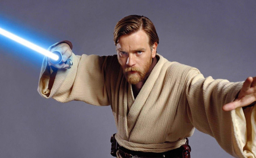

In [17]:
dest = './datasets/starwars/Obi-Wan/image_20211118_161838_478.jpg'
im = Image.open(dest)
im.to_thumb(256,256)

In [18]:
character_name, character_id, probs = learn.predict(PILImage.create(dest))
print(f"This is: {character_name}.")
print(f"Probability it's {character_name}: {probs[character_id]:.4f}")

This is: Obi-Wan.
Probability it's Obi-Wan: 0.9202


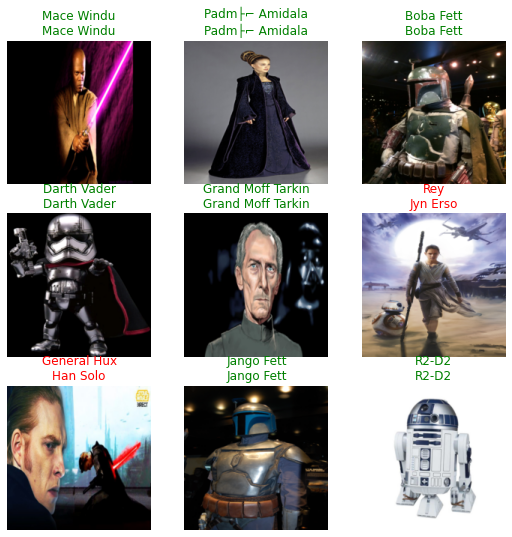

In [19]:
learn.show_results()

In [20]:
learn.export(fname='./star_wars_model_01.pkl', pickle_module=pickle, pickle_protocol=2)

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

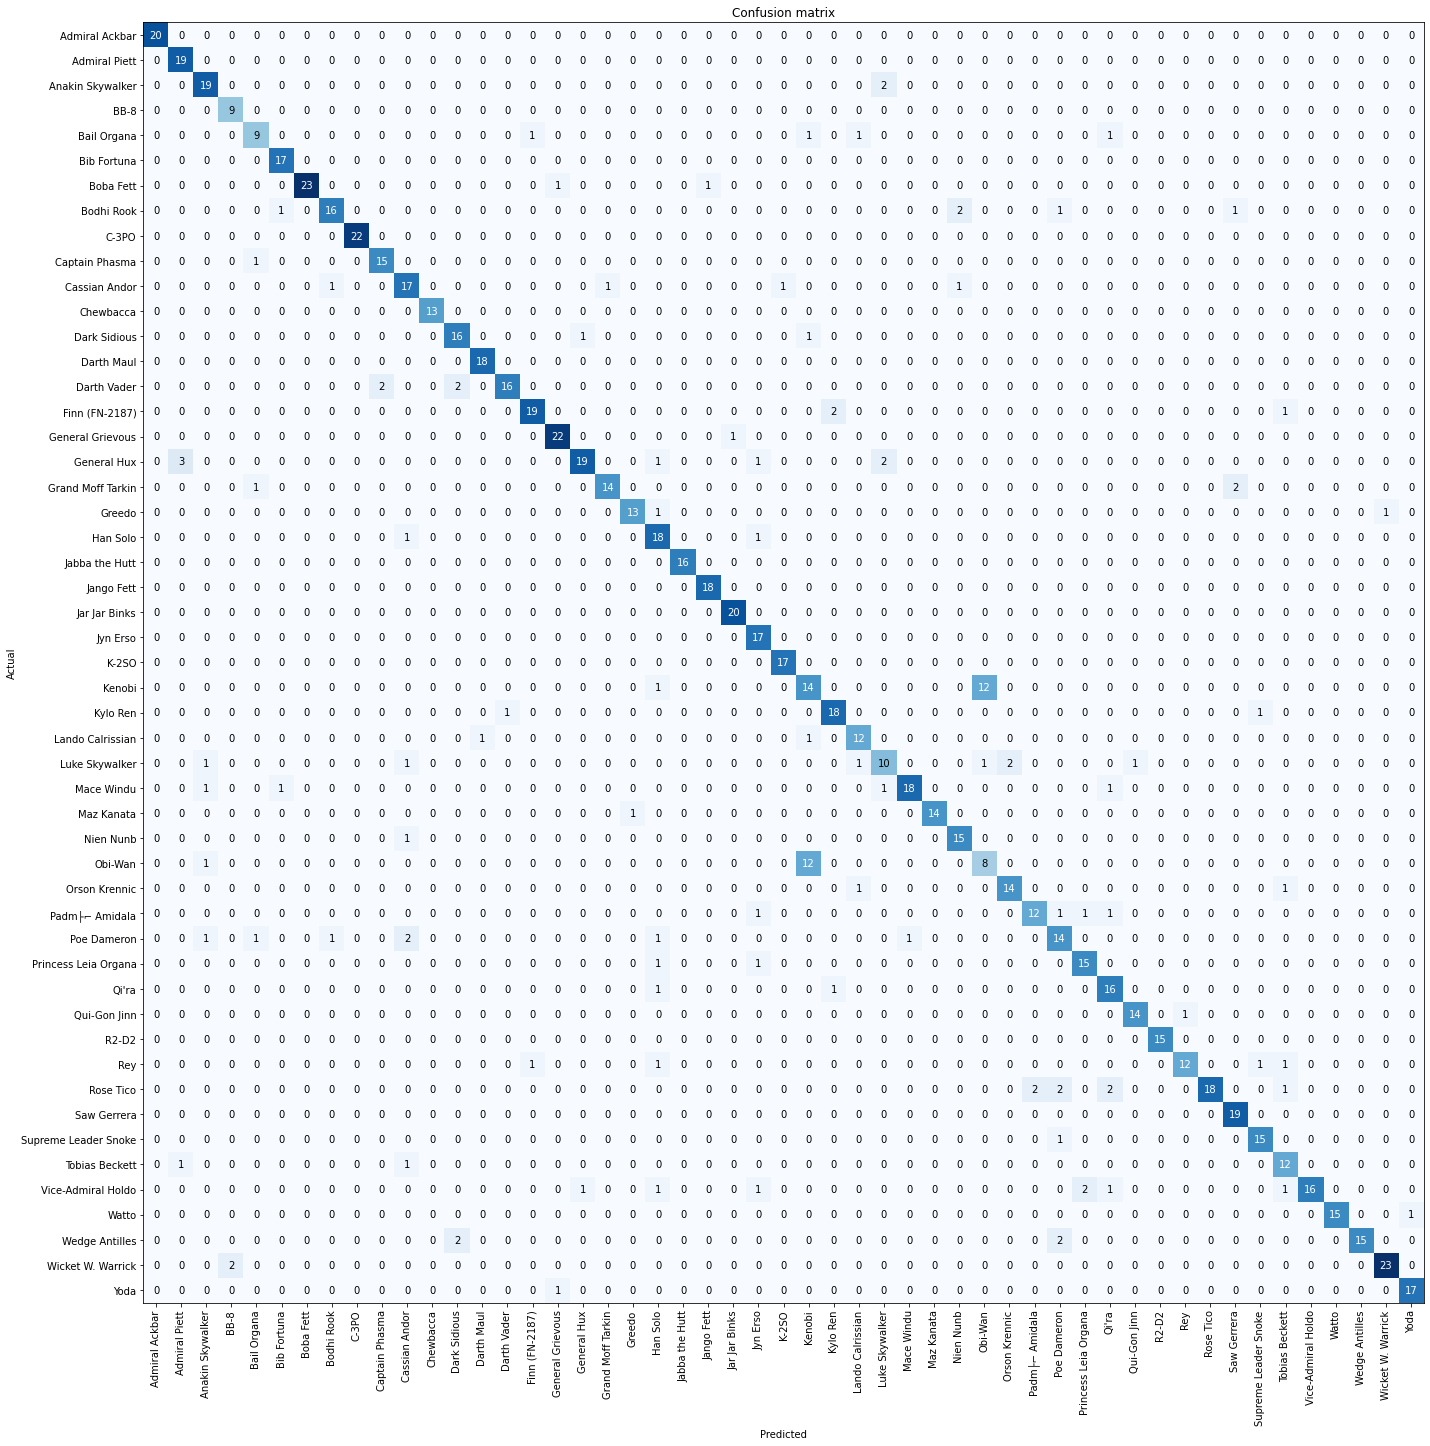

In [ ]:
interp.plot_confusion_matrix(figsize=(20,20))

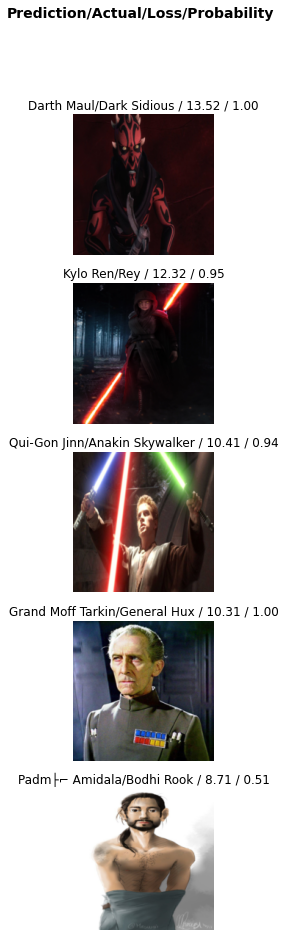

In [22]:
interp.plot_top_losses(5, nrows=5)